<img src='images/gdd-logo.png' width='300px' align='right' style="padding: 15px">


# Scikit Learn Refresh

This notebook is a refresher on using Scikit-Learn to build a machine learning model.

You will start by building a baseline model and then iterate on it in later notebooks to improve its performance.

- [About the data](#about)
- [<mark>Exercise: Data Exploration</mark>](#explore)
- [Establishing a baseline](#baseline)
- [Generalisation (splitting the data)](#splitting)
- [Model creation and evaluation](#build)
- [Conclusion and next steps](#conc)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

<a id=about></a>
## About the data

<img src='images/who.png' width='500px' align='right' style="padding: 15px">

According to the World Health Organization (WHO), strokes are the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

You will use this dataset to build a model that can **predict whether a patient is likely to have a `stroke`** (based on input parameters like gender, age and whether or not they smoke). 

Each row in the data provides relavant information about the patient.
### Features

1. `id`: unique identifier
1. `address`: a general address (city/county, state and postal code)
1. `gender`: "Male", "Female" or "Other"
1. `age`: age of the patient
1. `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
1. `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
1. `ever_married`: "No" or "Yes"
1. `work_type`: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
1. `residence_type`: "Rural" or "Urban"
1. `avg_glucose_level`: average glucose level in blood
1. `bmi`: body mass index
1. `smoking_status`: "formerly smoked", "never smoked", "smokes" or "Unknown"
1. `stroke`: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient.*

<a id=explore></a>

## Data Exploration

Let's start by importing the data and investigating its features.

In [4]:
stroke = pd.read_csv('data/stroke.csv').rename(columns=str.lower)
stroke.head()

,id,address,gender,age,who,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,"Vanessaside, VT 79393",Male,67.0,Man,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,APO AA 41945,Female,NaN,Woman,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,"North Jenniferfurt, VT 88077",Male,80.0,Man,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,"Rodriguezside, LA 93111",Female,49.0,Woman,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,"Ivanburgh, AZ 80818",Female,79.0,Woman,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


### <mark>Exercise</mark>

Conduct a preliminary analysis of the data by answering the questions below.

1. Take a look at missing values:
    - a) Are there any missing values in the data?
    - b) Use seaborn's `sns.heatmap` (on `df.isnull()`) to determine if there is a pattern to the missing values.
    - c) How will missing values impact training a machine learning model?

In [7]:
# a) Are there any missing values in the dataset?
missing_values = stroke.isnull().sum()
print(f"The number of missing values in each column: {missing_values}")

The number of missing values in each column: id                     0
address                0
gender                 0
age                  255
who                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<Axes: >

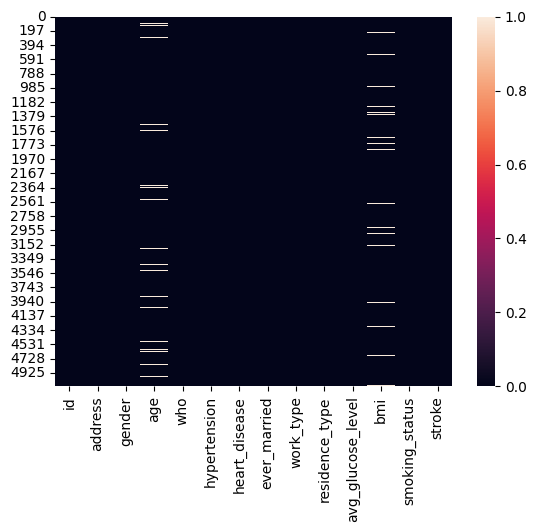

In [9]:
# Use seaborn's sns.heatmap (on df.isnull()) to determine if there is a pattern to the missing values
sns.heatmap(stroke.isnull())

<details>
<summary><span style="color:blue">Show text answers</span></summary>

If a sample contains missing values for one or more features (or the outcome), this observation cannot be used to train the ML model. 

Generally there are two options: 
1) Either you drop the sample entirely, or 
2) you try to fill/interpolate the missing value by using a constant, the median/mean feature value, or prediction using another (ML) model. We will discuss this in detail later.  
  

</details>

*Uncomment cell below to see the code answer:*

In [8]:
# %load answers/01-data-exploration-1.py

# a) How many missing values are there in each column?
display(stroke.isnull().sum())

# b) Use seaborn's heatmap (on df.isnull()) to determine if there is a pattern to the missing values
sns.heatmap(stroke.isnull())

2. Investigate the feature columns:
    - a) What are the datatypes of each feature? 
    - b) Do they make sense?
    - c) How will different types of features impact training a machine learning model?
    - d) Which features do you think will be informative for predicting stroke?

In [ ]:
    #- a) What are the datatypes of each feature?
stroke.info()

    #- b) Do they make sense?
    # Answer: they do not make sense, for example, the 'bmi' column should be a float but is an object. Also # 'stroke' should be a boolean but is an int.

    #- c) How will different types of features impact training a machine learning model?
    # Answer: Categorical features will need to be encoded, numerical features may need scaling, and missing values will need to be handled appropriately.

    #- d) Which features do you think will be informative for predicting stroke? 
    # Answer: Features like 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', and 'bmi' are likely to be informative for predicting stroke.

<details>
<summary><span style="color:blue">Show text answers</span></summary>

b) They mostly make sense. In Pandas, the `object` Dtype usually refers to strings. `age` being float64 is odd, since we usually measure age in full years. It would be good to investigate, if age is indeed only in full years or in fractions. Try: `stroke['age'].unique()`<br>
c) Computers cannot interpret strings. In order to use string/text features, you will have to find a way to encode strings into numbers. More about this later.<br>
d) Except the `id` column, all of the features could be potentially informative. However, `gender` and `who` could potentially encode the same information. Try: `stroke['who'].unique()`
</details>

*Uncomment cell below to see the code answer:*

In [15]:
# %load answers/01-data-exploration-2.py

# a) What are the datatypes of each feature? 
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   address            5109 non-null   object 
 2   gender             5109 non-null   object 
 3   age                4854 non-null   float64
 4   who                5109 non-null   object 
 5   hypertension       5109 non-null   int64  
 6   heart_disease      5109 non-null   int64  
 7   ever_married       5109 non-null   int64  
 8   work_type          5109 non-null   object 
 9   residence_type     5109 non-null   object 
 10  avg_glucose_level  5109 non-null   float64
 11  bmi                4908 non-null   float64
 12  smoking_status     5109 non-null   object 
 13  stroke             5109 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 558.9+ KB


**Bonus:** Investigate if there are any large outliers in the data. What effect would large outliers have on training a machine learning model? How would you treat them?

In [16]:
from scipy.stats import zscore
numeric_cols = ['age', 'avg_glucose_level', 'bmi']
z_scores = stroke[numeric_cols].apply(zscore)
outliers = (abs(z_scores) > 3).any(axis=1)
print("Rows with large outliers:")
print(stroke[outliers])

Rows with large outliers:
         id                      address  gender   age    who  hypertension  \
33    54401       Calhounmouth, VA 33607    Male  80.0    Man             0   
45    19824          Trevorton, NV 39846    Male  76.0    Man             1   
122   13491    East Robertstad, ME 11473    Male  80.0    Man             0   
123   44033     New Sergiobury, MS 50840    Male  56.0    Man             1   
135   71279       North Robert, MS 66761  Female  71.0  Woman             0   
193   69112   South Andrewfort, VT 97979    Male  68.0    Man             1   
196   58267         West Jerry, AK 82408    Male  70.0    Man             1   
220   20463        Cooperburgh, NH 17219    Male   NaN    Man             1   
243   40460                 DPO AA 68552  Female  68.0  Woman             1   
256   41413          Brianview, UT 14624  Female  75.0  Woman             0   
303   18518        Lake Thomas, WY 63283    Male  66.0    Man             0   
330   59368         Stoneb

<a id=baseline></a>

## Establishing a baseline

In a first step, you will develop a simple baseline model.


<mark>**Question**:</mark> Why is a baseline model useful?

<details>
<summary><span style="color:blue">Show answer</span></summary>
A baseline provides a point of reference from which to compare each model iteration as we build up our model and features. 

Without a baseline, you have **no point of reference** to consider whether you are continuing to add value with more complex features/ models. It defines the **hurdle** that all other machine learning algorithms must cross to demonstrate “skill” on the problem.
</details>


The simplest model would be to always predict the most likely outcome:

In [22]:
stroke['stroke'].value_counts(
    # normalize = True
    )


stroke
0    4860
1     249
Name: count, dtype: int64

In this case, you would always predict no stroke, which would yield a model accuracy of ~95%! This is good, right?

<mark>**Question:**</mark> Why is accuracy a flawed metric in this case?

<details>
<summary><span style="color:blue">Show solution</span></summary>
  
Especially with unbalanced outcomes such as here, high model accuracy does not mean you have a good model, because only ever predicting the majority outcome would already lead to a high accuracy. What you would like the model to do is to make informed predictions. To capture model performance, you will need more refined metrics for this (more about this later).

</details>

Alternatively, you could train a simple machine learning model with minimal preprocessing of your data.

Let's see what the low hanging fruit is by:
- Dropping any categorical (object) columns 
- Dropping columns with missing values
- Dropping the `id` column

<!-- - Building a Decision Tree with a max depth of 2
- Using `class_weight='balanced'` to address the imbalance of data -->

In [27]:
# dropping columns 

categorical_cols = ['work_type', 'smoking_status', 'who', 'gender', 'residence_type']
missing_cols = ['bmi', 'age']
drop_cols = ['id','address']

target = 'stroke'
print(target)


stroke


In [ ]:
X = stroke.drop(columns = drop_cols 
                        + categorical_cols
                        + missing_cols
                        + [target])

y = stroke[target]

stroke


In [24]:
X.head()

,hypertension,heart_disease,ever_married,avg_glucose_level
0,0,1,1,228.69
1,0,0,1,202.21
2,0,1,1,105.92
3,0,0,1,171.23
4,1,0,1,174.12


In [ ]:
y.head()

stroke
0    4860
1     249
Name: count, dtype: int64


<a id=splitting></a>

## Splitting the dataset

In the next step, you will split the dataset into a training set to train the model and a test set assess model performance.

<mark>**Question**:</mark> Why is train-test splitting a good idea?

<details>
<summary><span style="color:blue">Show solution</span></summary>
  
An important goal of machine learning is to create a model that does not only do well on the data that it has already seen, but will also perform well under new circumstances on data that is **has not seen before**. We call this ***generalisation***. 

This why it's import to separate our dataset into two parts:
* The _training_ set: This is the data (features and targets) that will **guide the learning process**. 
* The _test_ set: This is the data (features and targets) that will be used to **evaluate** how well our model has learned on *unseen, new* data. 

</details>

Scikit-learn's `train_test_split()` function allows you to split the data in a train- and test set. By default, the test set size is set to 25% and the data is shuffled. 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42, 
                                                    stratify=y) 

In [35]:
X_train.shape, X_test.shape
display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())


,hypertension,heart_disease,ever_married,avg_glucose_level
3586,1,1,1,198.32
1470,0,0,0,83.02
4431,0,0,0,146.10
2397,0,0,0,115.12
717,0,0,0,63.26


,hypertension,heart_disease,ever_married,avg_glucose_level
3921,0,0,1,84.35
2988,0,0,1,60.32
4364,0,0,1,96.02
1360,0,0,1,62.78
4024,0,0,0,104.55


3586    0
1470    0
4431    0
2397    0
717     0
Name: stroke, dtype: int64

3921    0
2988    0
4364    0
1360    0
4024    0
Name: stroke, dtype: int64

<mark> **Question:**</mark> What does the parameter `stratify` do and why would you use it?

<details>
<summary><span style="color:blue">Show solution</span></summary>
  
The stratify argument makes sure that the same proportion of stroke to no stroke is present in the training and test set. This is especially important with highly imbalanced data (as the likelihood of an unproportional split is increased). 

</details>

<a id=build></a>

## Model creation and evaluation

You are now ready to build a machine learning model! 

Scikit-learn has a rich [collection of algorithms](https://scikit-learn.org/stable/supervised_learning.html) readily available.

Normally, one model will be sufficient to establish a baseline. However, for educational purposes, we shall explore a few more simple models. 

For each model, the process will be as follows:

#### Scikit-Learn API usage

When training a model, the steps you will need to take in sklearn are always the same:
1. First, choose a model class and import that model 
2. Choose the model hyperparameters by instantiating this class with desired values.
3. Train the model to the preprocessed train data by calling the `fit()` method of the model instance.
4. Evaluate the model's performance using suitable metrics

### Decision Tree Classifier

Let's investigate the performance of a simple model such as the Decision Tree classifier.

Since the data is very imbalanced, you can add `class_weight='balanced'` as an argument.

In [36]:
# Step 1: Import model
from sklearn.tree import DecisionTreeClassifier

# Step 2: Instantiate model and set parameters
tree_model = DecisionTreeClassifier(max_depth=3, 
                                    class_weight='balanced',
                                    random_state=42)

# Step 3: Train model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

You already established that accuracy would be a bad metric to use for this particular dataset.

A better metric is the ***Receiver Operating Characteristic - Area Under the Curve*** (ROC-AUC). We will discuss the ROC-AUC more later, but for now: **The higher the ROC-AUC, the better the model** is at predicting 0 classes as 0 and 1 classes as 1. 

Let's see what score you get when using this metric.

In [37]:
# Step 4: Evaluate model
from sklearn.metrics import roc_auc_score

y_pred_test = tree_model.predict_proba(X_test)[:,1]
y_pred_train = tree_model.predict_proba(X_train)[:,1]

print(f'AUC score: {roc_auc_score(y_test, y_pred_test), roc_auc_score(y_train, y_pred_train)}')

AUC score: (0.7298851337011885, 0.739189613576196)


Although the Decision Tree is not necessarily the most high performant model, it is very interpretable. This can be helpful if you need to explain your model to non-technical stakeholders.

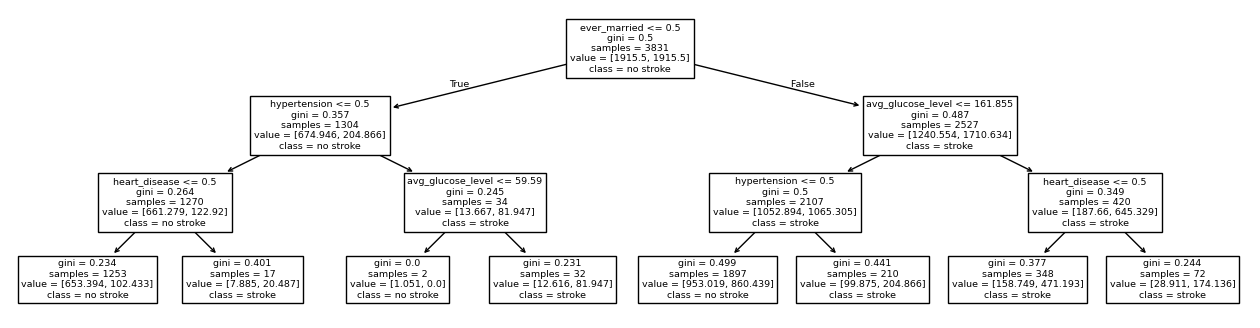

In [38]:
from sklearn.tree import plot_tree

fig,ax = plt.subplots(figsize=(16,4))

plot_tree(tree_model, 
          ax=ax, 
          feature_names=list(X_train.columns), 
          class_names=['no stroke', 'stroke'],
          );

### <mark>Exercise: Logistic regression</mark>

Implement a Logistic Regression model to see how it performs. Make sure to add the `class_weight` parameter again.

In [39]:
# Step 1: Import model
from sklearn.linear_model import LogisticRegression

# Step 2: Instantiate model and set parameters
log_model = LogisticRegression(max_iter=1000, 
                               class_weight='balanced',
                               random_state=42)

# Step 3: Train model
log_model.fit(X_train, y_train)

# Step 4: Evaluate model
from sklearn.metrics import roc_auc_score
y_pred_test = log_model.predict_proba(X_test)[:,1]
y_pred_train = log_model.predict_proba(X_train)[:,1]
print(f'AUC score: {roc_auc_score(y_test, y_pred_test), roc_auc_score(y_train, y_pred_train)}')


AUC score: (0.732405294991511, 0.7350262977159729)


In [40]:
# %load answers/01-logistic_regression.py
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(
                                    class_weight='balanced', 
                                   random_state=42)

logistic_model.fit(X_train, y_train)

y_pred_test = logistic_model.predict_proba(X_test)[:,1]
y_pred_train = logistic_model.predict_proba(X_train)[:,1]

print(f'AUC score: {roc_auc_score(y_test, y_pred_test), roc_auc_score(y_train, y_pred_train)}')


## Diving into ROC-AUC

You've used ROC-AUC now as a metric, but how exactly is it calculated?

Let's unpack these questions by starting to look at a confusion matrix.

### Confusion Matrix

A confusion matrix summarises the predictions of a classifier.

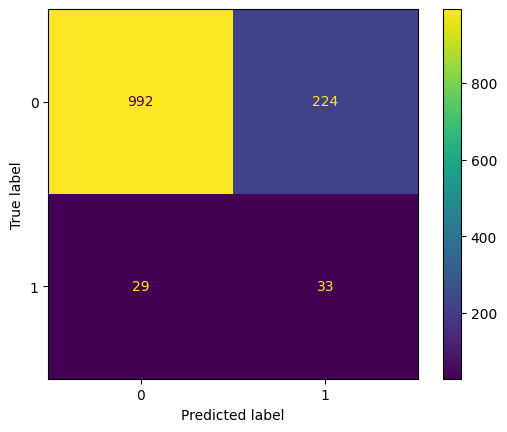

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
         tree_model, 
         X_test, y_test,);

<mark>**Question:** For this problem, which numbers would you be most interested in increasing/decreasing? 

<details>
<summary><span style="color:blue">Show solution</span></summary>
  
We would like to see true 0's predicted as 0, and true 1's predicted as 1. Thus, ideally, all predictions should be on the main diagonal of the confusion matrix.

</details>

### ROC and AUC

Typically a binary classifier will use a probability of 0.5 as its threshold for classification.

<img src='images/threshold.png' width='400px' style="padding: 15px">

However, adjusting this threshold may be beneficial for the purpose of your model.

Let's investigate how adjusting the classification threshold affects one of the models you learned previously.

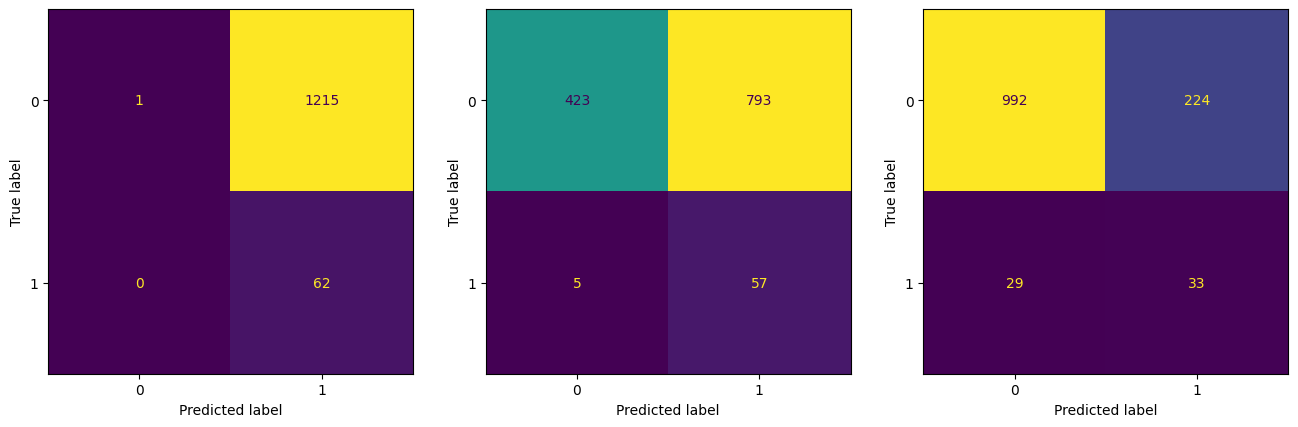

In [42]:
from custom_threshold import CustomThreshold

thresholds = [0, 0.25, 0.5]

fig, ax = plt.subplots(1,len(thresholds), figsize=(16,8))

for idx, threshold in enumerate(thresholds):

    tree = CustomThreshold(tree_model, threshold)
    
    ConfusionMatrixDisplay.from_estimator(
         tree, 
         X_test, y_test,
         ax=ax[idx], colorbar=False)

The **Receiver Operating Characteristics (ROC) curve**, is a graphical plot which illustrates the performance of a classifier at various threshold settings.

It is created by plotting the **True Positive Rate (TPR)** (the fraction of true positives out of the positives) against the **False Positive Rate (FPR)** (the fraction of false positives out of the negatives), at various threshold settings.

$$TPR = \frac{TP}{TP + FN} \ \ \  \text{vs.} \ \ \ FPR = \frac{FP}{TN + FP}$$

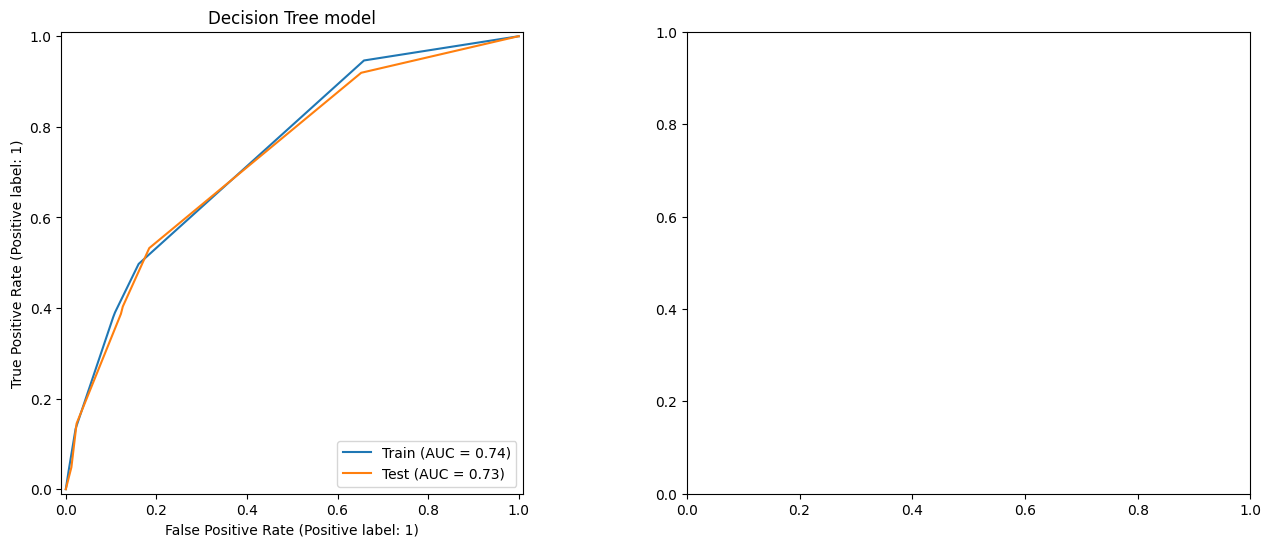

In [43]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(1, 2, figsize=(16,6))

RocCurveDisplay.from_estimator(tree_model, X_train, y_train, ax=ax[0], name='Train')
RocCurveDisplay.from_estimator(tree_model, X_test, y_test, ax=ax[0], name='Test')
ax[0].set(title='Decision Tree model');

# RocCurveDisplay.from_estimator(logistic_model, X_train, y_train, ax=ax[1], name='Train')
# RocCurveDisplay.from_estimator(logistic_model, X_test, y_test, ax=ax[1], name='Test')
# ax[1].set(title='Logistic model')

Typically, the ideal situation is the top left corner of the plot: a FPR of zero and a TPR of one. 

Whilst this may not be realistic, it does mean that a larger **Area Under the Curve (AUC)** is usually better. The “steepness” of ROC curves is also important, since it is ideal to maximize the TPR while minimizing the FPR.

<mark>**Question:** Why is the AUC score a good metric to use in this use case?</mark>

<details>
  <summary><span style="color:blue">Show solution</span></summary>
    
   AUC is a better metric here due to the imbalanced data issue: ROC analysis does not have any bias toward models that perform well on the minority class at the expense of the majority class - a property that is quite attractive when dealing with imbalanced data.
    
[Page 27, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013](https://www.amazon.com/dp/1118074629/ref=as_li_ss_tl?&linkCode=sl1&tag=inspiredalgor-20&linkId=615e87a9105582e292ad2b7e2c7ea339&language=en_US)

</details>

<mark>**Question:** Why is it important to calculate and visualise the metrics for train and test?</mark>

<details>
  <summary><span style="color:blue">Show solution</span></summary>
    
   It allows you to check for overfitting and whether your model is able to generalise to new data.

</details>

---
<img src='images/gdd-logo.png' width='300px' align='right' style="padding: 15px">

<a id=conc></a>

# Conclusion and next steps

This notebook has covered building a baseline classification problem using the sklearn estimator DecisionTreeClassifier.

Next steps to improve the model:
- Build an ensemble algorithm
- Conduct feature selection
- Generate useful features

Next steps to align with best practice:
- Hypertune model parameters
- Build custom transformers